In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import twitter_samples
import nbimporter
from nltk.corpus import stopwords 
import nbimporter

In [3]:
from functions import prepro_tweet, count_dict, visual_class, visual_words, gradientDescent 

Importing Jupyter notebook from functions.ipynb


In [5]:
from functions import predict_tweet, accuracy_score, single_pred, misClass, extract_features, sigmoid

## Data Load

 Prepare the data. The twitter_samples contains subsets of 5,000 positive tweets, 5,000 negative tweets.

In [6]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [13]:
# Train test split: 20% will be in the test set, and 80% in the training set.
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

In [14]:
# Create the numpy array of positive labels and negative labels.
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

### Visualizing the class balance

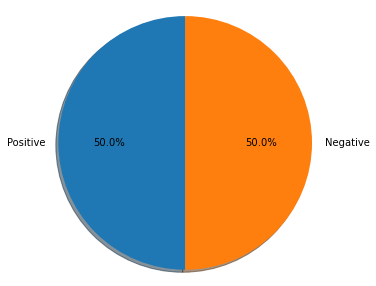

In [7]:
visual_class(['Positive', 'Negative'], [len(train_pos), len(train_neg)])

## Dictionary building

Create the frequency dictionary using the imported count_dict() function. The key is the tuple (word, label), such as ("happy",1) or ("happy",0). The value stored for each key is the count of how many times the word "happy" was associated with a positive label, or how many times "happy" was associated with a negative label.

In [15]:
# create frequency dictionary
freqs = count_dict(train_x, train_y)

## Visualizing word frequencies

The graph visualizes how often given words apper in positive and negative tweets. The plot is in the logarithmic scale to take into account the wide discrepancies between the raw counts. The red line marks the boundary between positive and negative areas. Words close to the red line can be classified as neutral.

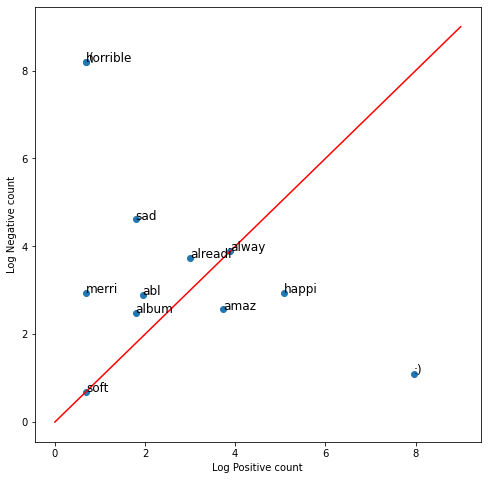

In [9]:
visual_words(['happi', 'merri', 'amaz', 'alway', 'alreadi',
              'album', 'abl', 'sad', ':)', ':(', 'horrible', 'soft'], freqs)

## Logistic regression for text classification

### The sigmoid function

The sigmoid function, defined as: ℎ(𝑧)=11+exp−𝑧(1), maps the input 'z' to a value that ranges between 0 and 1, and so it can be treated as a probability.

In [10]:
print(sigmoid(0))
print(sigmoid(4.92))

0.5
0.9927537604041685


A sigmoid Logistic regression takes a regular linear regression, and applies a sigmoid to the output of the linear regression.

Regression: 𝑧=𝜃0𝑥0+𝜃1𝑥1+𝜃2𝑥2+...𝜃𝑁𝑥𝑁
Logistic regression  ℎ(𝑧)=sigmoid(z)

Note that the 𝜃 values are "weights". 
𝑧=𝜃0𝑥0+𝜃1𝑥1+𝜃2𝑥2+...𝜃𝑁𝑥𝑁

We will refer to 'z' as the 'logits'.

## Feature extraction


Extract the features and store them in a matrix by implement the extract_features function. This function takes in a single tweet, processes the tweet using the imported process_tweet() function and saves the list of tweet words, loops through each word in the list of processed words and for each word, checks the freqs dictionary for the count when that word has a positive '1' and '0' label. This way we will extract 3 features. The first feature is 1 (for bias), the second the number of positive words in a tweet and the third feature is the number of negative words in a tweet. 

In [16]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

In [17]:
X

array([[1.000e+00, 3.007e+03, 6.100e+01],
       [1.000e+00, 3.556e+03, 4.440e+02],
       [1.000e+00, 2.991e+03, 1.140e+02],
       ...,
       [1.000e+00, 1.430e+02, 7.800e+02],
       [1.000e+00, 2.050e+02, 3.879e+03],
       [1.000e+00, 1.890e+02, 3.962e+03]])

## Model training

The model is trained by updating the weight vector 𝜃.
(𝜃=𝜃−𝛼𝑚×(𝐱𝑇⋅(𝐡−𝐲)))
The learning rate 𝛼 is equal to 1e-9; m is the number of rows of the training set, x is the training set, h - is the predicted probability and y is the true label.

We will iterate 1500 times using the entire data set each time calculating the cost function:
𝐽=−1𝑚×(𝐲𝑇⋅𝑙𝑜𝑔(𝐡)+(1−𝐲)𝑇⋅𝑙𝑜𝑔(1−𝐡)) 
The cost function 𝐽 is calculated and printed out by taking the dot product of the vectors 'y'(true label) and
'log(h)' (the log of the predicted probabilities). 

In [22]:
Y.shape

(8000, 1)

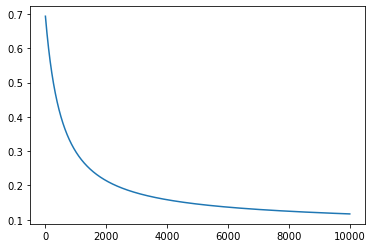

In [19]:
# training labels corresponding to X
Y = train_y

# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 10000)

## Predict and evaluate the accuracy of the LR.

Given a tweet the function predict_tweet process it, then extract the features, applies the model's learned weights
on the features to get the logits and applies the sigmoid to the logits to get the probability of a tweet being 
positive or negative:
𝑦𝑝𝑟𝑒𝑑=𝑠𝑖𝑔𝑚𝑜𝑖𝑑(𝐱⋅𝜃)

In [20]:
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great']:
    print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, theta)))

I am happy -> 0.546617
I am bad -> 0.489670
this movie should have been great. -> 0.539615
great -> 0.538829


In [21]:
a = accuracy_score(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {a:.4f}")

Logistic regression model's accuracy = 0.9950


## Error Analysis

Get some tweets that the model misclassified:

In [22]:
misClass(test_x,test_y, freqs, theta)

Label Predicted Tweet
THE TWEET IS: I'm playing Brain Dots : ) #BrainDots
http://t.co/UGQzOx0huu
THE PROCESSED TWEET IS: ["i'm", 'play', 'brain', 'dot', 'braindot']
1	0.48035000	b"i'm play brain dot braindot"
********************************************************************************
THE TWEET IS: I'm playing Brain Dots : ) #BrainDots http://t.co/aOKldo3GMj http://t.co/xWCM9qyRG5
THE PROCESSED TWEET IS: ["i'm", 'play', 'brain', 'dot', 'braindot']
1	0.48035000	b"i'm play brain dot braindot"
********************************************************************************
THE TWEET IS: I'm playing Brain Dots : ) #BrainDots http://t.co/R2JBO8iNww http://t.co/ow5BBwdEMY
THE PROCESSED TWEET IS: ["i'm", 'play', 'brain', 'dot', 'braindot']
1	0.48035000	b"i'm play brain dot braindot"
********************************************************************************
THE TWEET IS: @msarosh Uff Itna Miss karhy thy ap :p
THE PROCESSED TWEET IS: ['uff', 'itna', 'miss', 'karhi', 'thi', 'ap', ':p']

## Make a single tweet prediction:

In [23]:
single_pred('And I said to myself what a wonderful world!', freqs, theta)

['said', 'wonder', 'world']
[[0.50599741]]
Positive sentiment
